In [1]:
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [4]:
bikesharing_data = pd.read_csv('bike_sharing_daily.csv', index_col = 0)
bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bikesharing_data.shape

(731, 15)

In [6]:
bikesharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [7]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

In [8]:
#correlation = statistical relationship that exists between two variables
#correlation between temperature and count
np.corrcoef(bikesharing_data['temp'],
           bikesharing_data['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [9]:
#another way to see correlation is using the core function from pandas data frame
bikesharing_data['temp'].corr(bikesharing_data['cnt'])

0.6274940090334918

In [10]:
#the calculation that numpy and pandas calculates by default is pearson's correlation coefficient
#wich evaluates the linear relationships between two continuous variables
#returns the correlation and the p value, typically any value under 5% of 0.05 is considered significant
pearsonr(bikesharing_data['temp'], 
        bikesharing_data['cnt'])

(0.627494009033492, 2.8106223975907754e-81)

In [11]:
#we can also calculate spearmans correlation coefficient
#it's based on the ranks of the variables rather than actual raw values
# - usually used with ordinal data
#returns the correlation and the p value, typically any value under 5% of 0.05 is considered significant
spearmanr(bikesharing_data['temp'],
         bikesharing_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

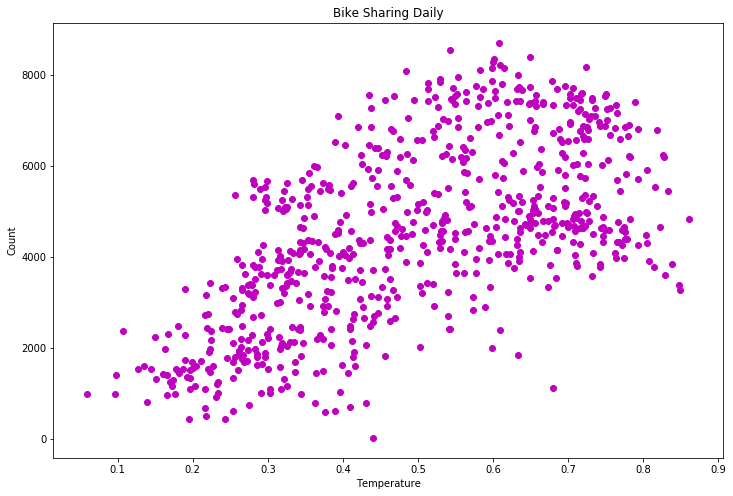

In [12]:
#the correlation coefficient that we calculated between these two variables
#tell us that there is a linear relationship exists between these two variables
plt.figure(figsize = (12, 8))
plt.scatter(bikesharing_data['temp'],
           bikesharing_data['cnt'], color = 'm')
plt.title('Bike Sharing Daily')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [13]:
#correlation between working day and registered users
#it's strength is lower
np.corrcoef(bikesharing_data['workingday'],
           bikesharing_data['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [16]:
bikesharing_data['workingday'].corr(bikesharing_data['registered'])

0.3039071170459171

In [17]:
pearsonr(bikesharing_data['workingday'], 
        bikesharing_data['registered'])

(0.30390711704591733, 4.3815710893705565e-17)

In [18]:
spearmanr(bikesharing_data['workingday'],
         bikesharing_data['registered'])

SpearmanrResult(correlation=0.3058584564758216, pvalue=2.6994118569378256e-17)

<function matplotlib.pyplot.show(*args, **kw)>

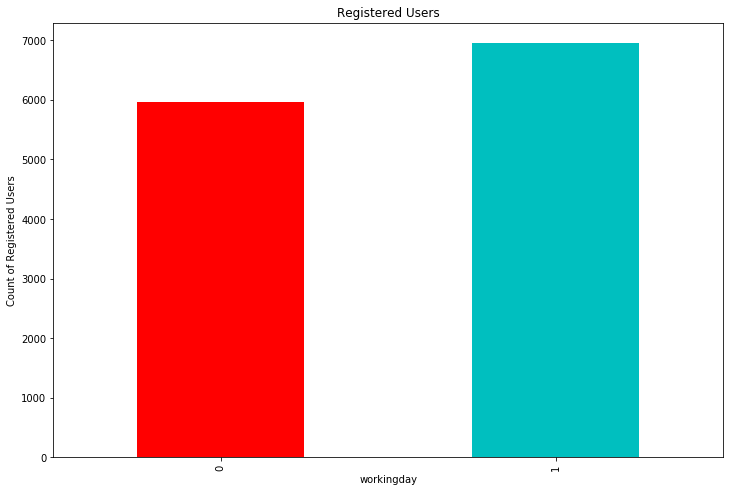

In [19]:
#visualize using a bar graph, group the data by working day and find the count of registered users
#who use bikes on a working day vs a non-working day
#as a result, on a working day, the counts are a little higher
ax = plt.subplot()
bikesharing_data.groupby('workingday').max()['registered'].plot(kind = 'bar',
                                                               figsize = (12, 8),
                                                               ax = ax,
                                                               color = ['r', 'c'])
plt.title('Registered Users')
plt.ylabel('Count of Registered Users')
plt.show

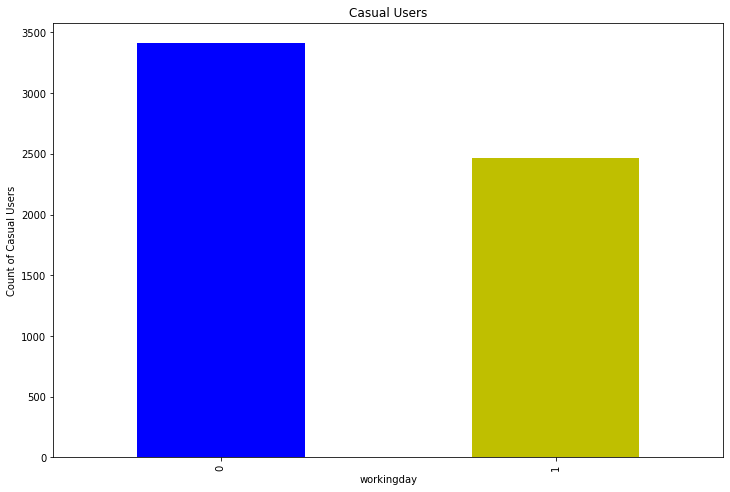

In [20]:
#the counts of bikes rented by casual renters on a working day vs non-working day
#we can see that the relationship is different: there are fewer casual users on a working day
ax = plt.subplot()
bikesharing_data.groupby('workingday').max()['casual'].plot(kind = 'bar',
                                                           figsize = (12, 8),
                                                           ax = ax,
                                                           color = ['b', 'y'])
plt.title('Casual Users')
plt.ylabel('Count of Casual Users')
plt.show()

In [21]:
#correlation = statistical relationship that exists between two variables
#correlation between windspeed and count
#there is a slight negative correlation: when windspeed are high, people tend not to ride bieks
np.corrcoef(bikesharing_data['windspeed'],
           bikesharing_data['cnt'])

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

In [22]:
bikesharing_data['windspeed'].corr(bikesharing_data['cnt'])

-0.23454499742167

In [23]:
pearsonr(bikesharing_data['windspeed'], 
        bikesharing_data['cnt'])

(-0.23454499742167, 1.3599586778869642e-10)

In [24]:
spearmanr(bikesharing_data['windspeed'],
         bikesharing_data['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

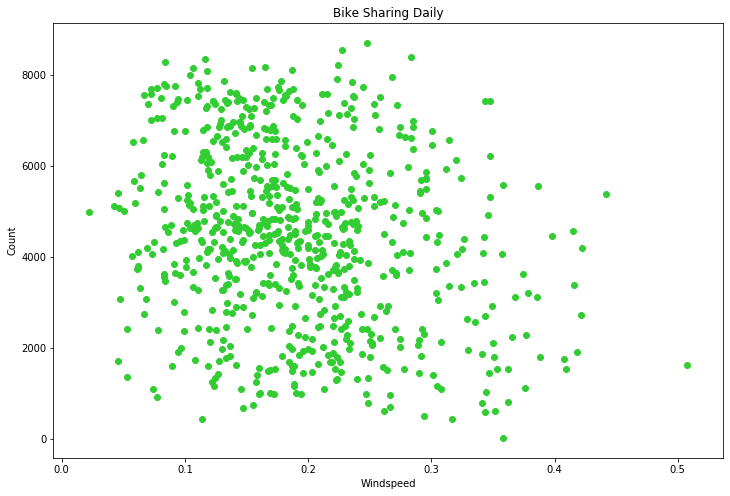

In [25]:
#scatter plot visualization of this relationship will bear out the negative
#linear relationship that exists between the count of bikes rented and the current windspeed
plt.figure(figsize = (12, 8))
plt.scatter(bikesharing_data['windspeed'],
           bikesharing_data['cnt'], color = 'limegreen')
plt.title('Bike Sharing Daily')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

In [26]:
#if we want to view all of the correlation coefficients accross all of the
#pairs of variables in our data, we use a correlation matrix
#core functions on pandas data frame will calculate the correlation matrix
#and display it in a grid format. Observe that every variable is perfectly 
#positively correlated (1.0) with itself (season x season, yr x yr etc)
bikesharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


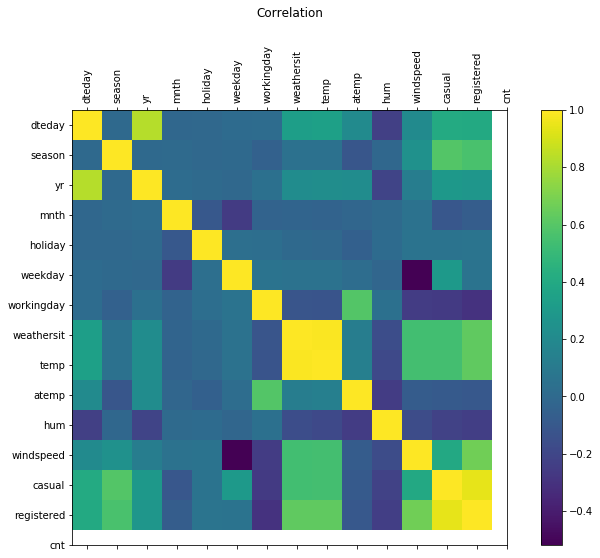

In [27]:
#correlation matrices can be visualized in a graphical format using
#a heatmap representation.
#using Matplotlib, this heatmap can be generated using plt.matshow
#The heatmap representation of a correlation matrix is simply a color grid
#where the rows and columns are the variables that are presented in your dataset
#Positive correlations and negative correlation that exists in your data
#are represented using the colors of a cell. In this color map, lighter colors represent
#positive correlations, darker, purplish colors represent negative correlations
plt.figure(figsize = (12, 8))
plt.matshow(bikesharing_data.corr(),
           fignum = False,
           aspect = 'equal')
columns = len(bikesharing_data.columns)
plt.xticks(range(columns), bikesharing_data.columns)
plt.yticks(range(columns), bikesharing_data.columns)
plt.colorbar()
plt.xticks(rotation = 90)
plt.title('Correlation', y = 1.2)
plt.show()

In [28]:
#another way to visualize correlations that exists in your data
#yellowbrick Python library
!pip install yellowbrick

In [29]:
#setting target feature against (cnt) against all the columns correlations to be calculated
#except the ones in the drop function. We'll drop these four columns from our feature set
target = bikesharing_data['cnt']
features = bikesharing_data.drop(['casual', 'registered', 'cnt', 'dteday'], axis = 1)

In [30]:
#import it, set up a list of feature names tha we are going to display
from yellowbrick.target import FeatureCorrelation
feature_names = list(features.columns)
feature_names

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

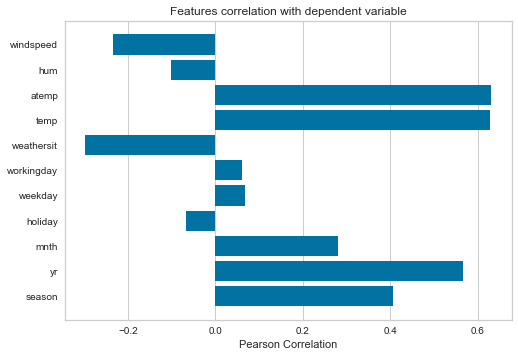

In [31]:
#instantiate the FeatureCorrelation Python object, the labels are the feature names
#call fit on the features vs the target to calculate correlations
#positively correlated features have bars towards the right;
#negatively correlated features have bars towards the left.
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(features, target)
visualizer.poof()